## MQB7046 MODELLING PUBLIC HEALTH DATA - Ordinal logistic regression
Prepared by Claire Choo (15/4/2024)

Ordinal Logistic Regression is a statistical model used when the dependent variable is ordinal in nature, that is it has a clear ordering or ranking, but the differences between the categories may not be equal. 
The dependent variable must be ordinal, such as a rating scale (e.g. 1 = poor, 2 = fair, 3 = good, 4 = excellent). 
The model assumes that the relationship between the predictor variables and the logit of the cumulative probabilities is the same for all logits (the proportional odds assumption). 

#### Practical 5

A study examined factors that influence the decision of whether to apply to graduate programme.  Undergraduates were asked if they are unlikely, somewhat likely, or very likely to apply to graduate programme. The outcome variable has three categories coded as 0,1,2. Data on parental educational status (0 is no tertiary education, 1 is with tertiary education), whether the undergraduate institution is public (1) or private (0), and current GPA was collected. 

In [1]:
import pandas as pd

# Load the dataset into a DataFrame

grad = pd.read_csv("C:\\Users\\USER\\MPHD notebooks\\grad.csv")

# Display the first few rows of the DataFrame to verify that the data is loaded correctly
print(grad)

     pared  public   gpa  apply
0        0       0  3.26      2
1        1       0  3.21      1
2        1       1  3.94      0
3        0       0  2.81      1
4        0       0  2.53      1
..     ...     ...   ...    ...
395      0       0  3.70      0
396      0       0  2.63      0
397      0       0  2.25      1
398      0       0  3.26      1
399      0       0  3.52      2

[400 rows x 4 columns]


In [2]:
print(grad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pared   400 non-null    int64  
 1   public  400 non-null    int64  
 2   gpa     400 non-null    float64
 3   apply   400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


In [3]:
grad.dtypes

pared       int64
public      int64
gpa       float64
apply       int64
dtype: object

In [4]:
# Perform the descriptive statistics 
# Conduct hypothesis testing

In [5]:
# run ordinal logistic regression with one predictor (pared)

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel


model = OrderedModel(grad['apply'], grad['pared'], distr='logit')

results = model.fit(method='bfgs', disp=True)
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.903488
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
                             OrderedModel Results                             
Dep. Variable:                  apply   Log-Likelihood:                -361.40
Model:                   OrderedModel   AIC:                             728.8
Method:            Maximum Likelihood   BIC:                             740.8
Date:                Fri, 12 Apr 2024                                         
Time:                        15:05:13                                         
No. Observations:                 400                                         
Df Residuals:                     397                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [18]:
# Add the exponentiated coefficient (“somewhat / very likely”) to the base coefficient (“unlikely / somewhat likely”) 

# generate coefficient 

import numpy as np

# Coefficients from your regression results
coef_01 = 0.3768
coef_12 = 0.7300

# Calculate the sum of coef_01 and exp(coef_12)
coef = coef_01 + np.exp(coef_12)

print("Sum of coefficient 0/1 and exp(coefficient 1/2):", "{:.3f}".format(coef))


Sum of coefficient 0/1 and exp(coefficient 1/2): 2.452


In [6]:
# Generate odds ratio from ordinal regression

import numpy as np

# Get the coefficients and confidence intervals from the fitted model
coef = results.params
conf_int = results.conf_int()

# Compute the odds ratios
odds_ratio = np.exp(coef)

# Compute the confidence intervals for the odds ratios
odds_ratio_ci = np.exp(conf_int)

# Create a DataFrame to display the results
odds_ratio_df = pd.DataFrame({'Coefficient': coef,
                              'Odds Ratio': odds_ratio,
                              '95% CI Lower': odds_ratio_ci[0],
                              '95% CI Upper': odds_ratio_ci[1]})

print(odds_ratio_df)


       Coefficient  Odds Ratio  95% CI Lower  95% CI Upper
pared     1.127480    3.087866      1.842573      5.174785
0/1       0.376843    1.457676      1.174188      1.809608
1/2       0.729963    2.075005      1.773232      2.428133


##### Interpretation:

pared: The coefficients represent the estimated effect of each predictor variable on the log odds of being in a higher category of the ordinal dependent variable 'apply'. For example, for every one-unit increase in 'pared', the log odds of being in a higher category of 'apply' increase by approximately 1.1275.
The odds ratio for 'pared' is calculated as exp(1.127) = 3.09. 
Individuals with parental tertiary education ("pared" = 1) have 3 times the odds of being in a higher category ("somewhat likely" or "very likely") to apply graduate programme compared to those without parental education ("pared" = 0), all else being equal.

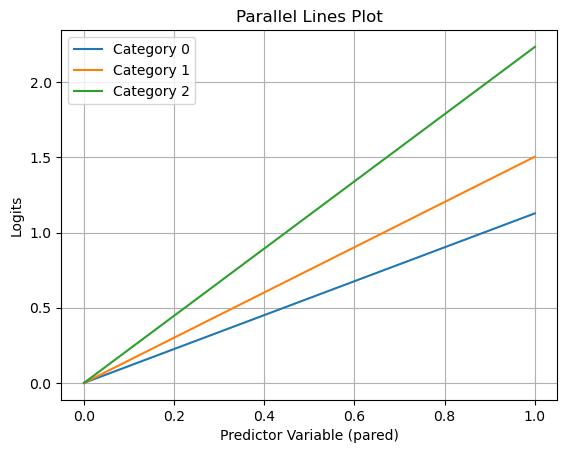

In [7]:
# Visualise parallel lines - how the log odds of each category of the response variable change as the predictor variable "pared" varies


import numpy as np
import matplotlib.pyplot as plt

# Extract the coefficients from the model results
coef_pared = results.params['pared']
coef_01 = results.params['0/1']
coef_12 = results.params['1/2']

# Create an array of predictor variable values
pared_values = np.linspace(grad['pared'].min(), grad['pared'].max(), 100)

# Calculate the logits for each category of the response variable
logit_0 = coef_pared * pared_values
logit_1 = (coef_pared + coef_01) * pared_values
logit_2 = (coef_pared + coef_01 + coef_12) * pared_values

# Plot the logits against the predictor variable values
plt.plot(pared_values, logit_0, label='Category 0')
plt.plot(pared_values, logit_1, label='Category 1')
plt.plot(pared_values, logit_2, label='Category 2')

# Add labels and legend
plt.xlabel('Predictor Variable (pared)')
plt.ylabel('Logits')
plt.title('Parallel Lines Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [8]:
# run ordinal logistic regression with another predictor (e.g. public)

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

model = OrderedModel(grad['apply'],
                        grad['public'],
                        distr='logit')

results = model.fit(method='bfgs', disp=True)
results.summary()


Optimization terminated successfully.
         Current function value: 0.925989
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  apply   Log-Likelihood:                -370.40
Model:                   OrderedModel   AIC:                             746.8
Method:            Maximum Likelihood   BIC:                             758.8
Date:                Fri, 12 Apr 2024                                         
Time:                        15:05:14                                         
No. Observations:                 400                                         
Df Residuals:                     397                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
public         0.1833      0.284      0.646      0.518      -0.373       0.739
0/1            0.2252      0.108      2.093      0.036       0.014       0.436
1/2            0.6921      0.080      8.649      0.000       0.535       0.849
==============================================================================
"""

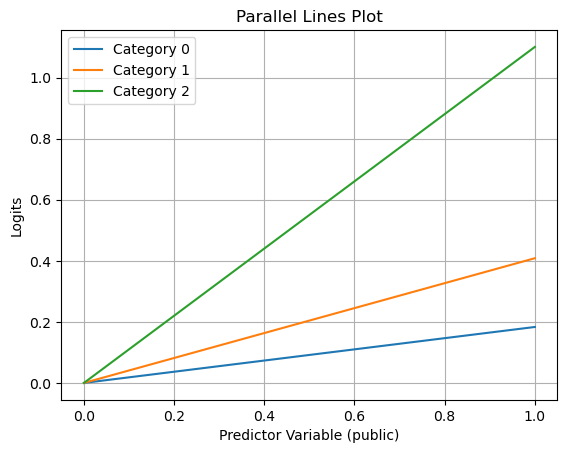

In [11]:
# Visualise parallel lines - how the log odds of each category of the response variable change as the predictor variable "public" varies

import numpy as np
import matplotlib.pyplot as plt

# Extract the coefficients from the model results
coef_public = results.params['public']
coef_01 = results.params['0/1']
coef_12 = results.params['1/2']

# Create an array of predictor variable values
public_values = np.linspace(grad['public'].min(), grad['public'].max(), 100)

# Calculate the logits for each category of the response variable
logit_0 = coef_public * public_values
logit_1 = (coef_public + coef_01) * public_values
logit_2 = (coef_public + coef_01 + coef_12) * public_values

# Plot the logits against the predictor variable values
plt.plot(public_values, logit_0, label='Category 0')
plt.plot(public_values, logit_1, label='Category 1')
plt.plot(public_values, logit_2, label='Category 2')

# Add labels and legend
plt.xlabel('Predictor Variable (public)')
plt.ylabel('Logits')
plt.title('Parallel Lines Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [13]:
# run ordinal logistic regression with multiple predictors ('pared', 'public', 'gpa')

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

model = OrderedModel(grad['apply'],
                        grad[['pared', 'public', 'gpa']],
                        distr='logit')

results = model.fit(method='bfgs', disp=True)
results.summary()


Optimization terminated successfully.
         Current function value: 0.896281
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  apply   Log-Likelihood:                -358.51
Model:                   OrderedModel   AIC:                             727.0
Method:            Maximum Likelihood   BIC:                             747.0
Date:                Fri, 12 Apr 2024                                         
Time:                        15:11:03                                         
No. Observations:                 400                                         
Df Residuals:                     395                                         
Df Model:                           3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pared          1.0476      0.266      3.942      0.000       0.527       1.569
public        -0.0586      0.298     -0.197      0.844      -0.642       0.525
gpa            0.6158      0.261      2.363      0.018       0.105       1.127
0/1            2.2035      0.780      2.827      0.005       0.676       3.731
1/2            0.7398      0.080      9.236      0.000       0.583       0.897
==============================================================================
"""

##### Interpretation:

The coefficients represent the estimated effect of each predictor variable on the log odds of being in a higher category of the ordinal dependent variable 'apply'.
For example, for every one-unit increase in 'pared', the log odds of being in a higher category of 'apply' increase by approximately 1.0476.

The odds ratio for 'pared' is calculated as exp(1.0476) = 2.85 (approximately). For every one-unit increase in parental education level, the odds of being in a higher category of 'apply' (e.g., from 'unlikely' to 'somewhat likely' or from 'somewhat likely' to 'very likely') increase by approximately 2.85 times, holding other variables constant.

Similarly, for every one-unit increase in 'gpa', the log odds of being in a higher category of 'apply' increase by approximately 0.6158

The odds ratio for 'gpa' is calculated as exp(0.6158) = 1.85 (approximately).: For every one-unit increase in GPA, the odds of being in a higher category of 'apply' increase by approximately 1.85 times, holding other variables constant
.
The coefficient for 'public' is not statistically significant (p-value > 0.05), indicating that it does not have a significant effect on the log odds of being in a higher category of 'apply'.

In [21]:
# Generate predicted probabilities for each observation
predicted_probabilities = model.predict(results.params, grad[['pared', 'public', 'gpa']])
predicted_probabilities


array([[0.54884071, 0.35932276, 0.09183653],
       [0.30558191, 0.47594216, 0.21847593],
       [0.22938357, 0.47819057, 0.29242586],
       ...,
       [0.69380357, 0.25470075, 0.05149568],
       [0.54884071, 0.35932276, 0.09183653],
       [0.50896793, 0.38494062, 0.10609145]])

For the first observation, the predicted probabilities are approximately 0.549 for Category 1, 0.359 for Category 2, and 0.092 for Category 3. This suggests that the model predicts a higher likelihood of this observation falling into Category 1 compared to the other categories.
For the second observation, the predicted probabilities are approximately 0.306 for Category 1, 0.476 for Category 2, and 0.218 for Category 3. This suggests that the model predicts a higher likelihood of this observation falling into Category 2 compared to the other categories. The rest continues...

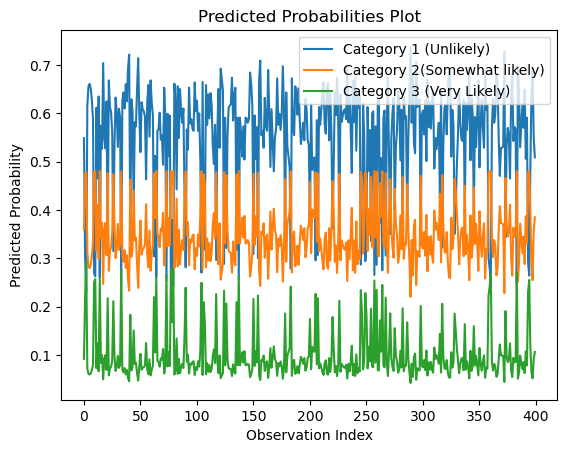

In [23]:
import matplotlib.pyplot as plt

# Plotting predicted probabilities
plt.plot(predicted_probabilities)
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities Plot')
plt.legend(['Category 1 (Unlikely)', 'Category 2(Somewhat likely)', 'Category 3 (Very Likely)'])  # Add legend for each category
plt.show()


In [22]:
# Calculate cumulative probabilities
cumulative_probabilities = np.cumsum(predicted_probabilities, axis=1)

# Now cumulative_probabilities will contain the cumulative probabilities for each observation
print(cumulative_probabilities)

[[0.54884071 0.90816347 1.        ]
 [0.30558191 0.78152407 1.        ]
 [0.22938357 0.70757414 1.        ]
 ...
 [0.69380357 0.94850432 1.        ]
 [0.54884071 0.90816347 1.        ]
 [0.50896793 0.89390855 1.        ]]


The model predicts a cumulative probability of approximately 0.549 for the observation to belong to Category 1 or below, a cumulative probability of approximately 0.908 to belong to Category 2 or below, and a cumulative probability of 1 to belong to Category 3 (since it's the highest category).

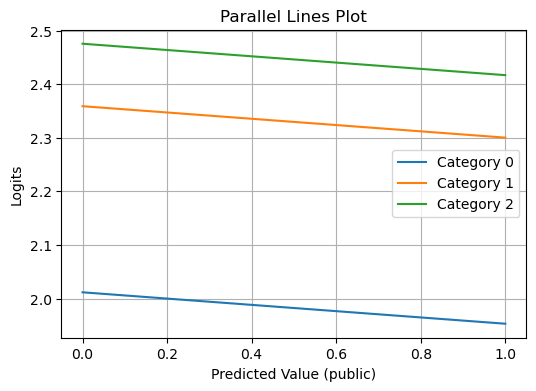

In [32]:
 # Visualise parallel lines - how the log odds of each category of the response variable change as the predictor variable "public" varies, 
 # while other predictors ("pared" and "gpa") are held constant at their mean values.

import numpy as np
import matplotlib.pyplot as plt

# Extract the coefficients from the model results
coef_pared = results.params['pared']
coef_01 = results.params['0/1']
coef_12 = results.params['1/2']
coef_public = results.params['public']
coef_gpa = results.params['gpa']

# Create an array of predictor variable values
public_values = np.linspace(grad['public'].min(), grad['public'].max(), 100)
pared_mean = grad['pared'].mean()
gpa_mean = grad['gpa'].mean()

# Calculate the logits for each category of the response variable
logit_0 = (coef_public * public_values +
           coef_pared * pared_mean +
           coef_gpa * gpa_mean)
logit_1 = ((coef_public * public_values +
            (coef_pared + coef_01) * pared_mean +
            coef_gpa * gpa_mean))
logit_2 = ((coef_public * public_values +
            (coef_pared + coef_01 + coef_12) * pared_mean +
            coef_gpa * gpa_mean))

# Specify smaller figure size
plt.figure(figsize=(6, 4))

# Plot the logits against the predictor variable values
plt.plot(public_values, logit_0, label='Category 0')
plt.plot(public_values, logit_1, label='Category 1')
plt.plot(public_values, logit_2, label='Category 2')

# Add labels and legend
plt.xlabel('Predicted Variable (public)')
plt.ylabel('Logits')
plt.title('Parallel Lines Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


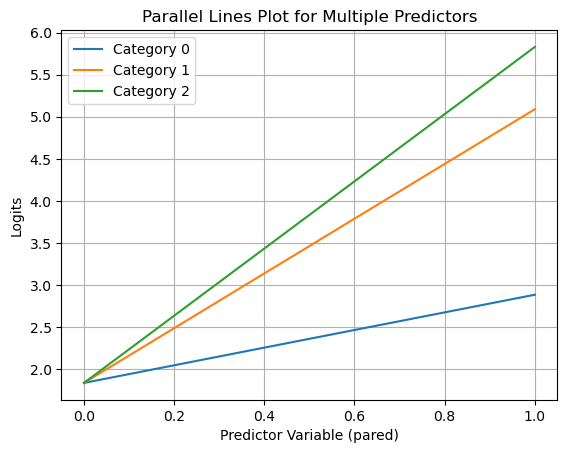

In [25]:
 # Visualise parallel lines - how the log odds of each category of the response variable change as the predictor variable "pared" varies, 
 # while other predictors ("public" and "gpa") are held constant at their mean values.

import numpy as np
import matplotlib.pyplot as plt

# Extract the coefficients from the model results
coef_pared = results.params['pared']
coef_01 = results.params['0/1']
coef_12 = results.params['1/2']
coef_public = results.params['public']
coef_gpa = results.params['gpa']

# Create an array of predictor variable values
pared_values = np.linspace(grad['pared'].min(), grad['pared'].max(), 100)
public_values = np.linspace(grad['public'].min(), grad['public'].max(), 100)
gpa_values = np.linspace(grad['gpa'].min(), grad['gpa'].max(), 100)

# Calculate the logits for each category of the response variable
logit_0 = (coef_pared * pared_values +
           coef_public * grad['public'].mean() +
           coef_gpa * grad['gpa'].mean())
logit_1 = ((coef_pared + coef_01) * pared_values +
           coef_public * grad['public'].mean() +
           coef_gpa * grad['gpa'].mean())
logit_2 = ((coef_pared + coef_01 + coef_12) * pared_values +
           coef_public * grad['public'].mean() +
           coef_gpa * grad['gpa'].mean())

# Plot the logits against the predictor variable values
plt.plot(pared_values, logit_0, label='Category 0')
plt.plot(pared_values, logit_1, label='Category 1')
plt.plot(pared_values, logit_2, label='Category 2')

# Add labels and legend
plt.xlabel('Predictor Variable (pared)')
plt.ylabel('Logits')
plt.title('Parallel Lines Plot for Multiple Predictors')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



This plot visualizes the effect of public on the logits for each category of the response variable while holding pared and gpa constant at their mean values. This assesses the relationship between the predictor variables and the response variable in the context of the ordinal logistic regression model.

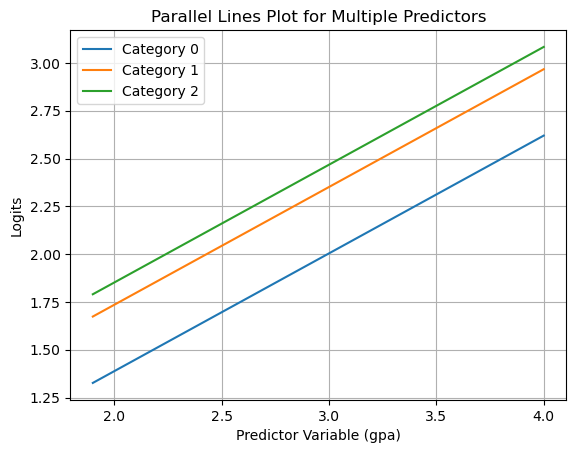

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the coefficients from the model results
coef_pared = results.params['pared']
coef_01 = results.params['0/1']
coef_12 = results.params['1/2']
coef_public = results.params['public']
coef_gpa = results.params['gpa']

# Create an array of predictor variable values
gpa_values = np.linspace(grad['gpa'].min(), grad['gpa'].max(), 100)
pared_mean = grad['pared'].mean()
public_mean = grad['public'].mean()

# Calculate the logits for each category of the response variable
logit_0 = (coef_gpa * gpa_values +
           coef_pared * pared_mean +
           coef_public * public_mean)
logit_1 = ((coef_gpa * gpa_values +
            (coef_pared + coef_01) * pared_mean +
            coef_public * public_mean))
logit_2 = ((coef_gpa * gpa_values +
            (coef_pared + coef_01 + coef_12) * pared_mean +
            coef_public * public_mean))

# Plot the logits against the predictor variable values
plt.plot(gpa_values, logit_0, label='Category 0')
plt.plot(gpa_values, logit_1, label='Category 1')
plt.plot(gpa_values, logit_2, label='Category 2')

# Add labels and legend
plt.xlabel('Predictor Variable (gpa)')
plt.ylabel('Logits')
plt.title('Parallel Lines Plot for Multiple Predictors')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [33]:
# Likelihood Ratio Test :

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Calculate the likelihood ratio test manually
null_model = sm.OLS(np.array(results.endog), np.ones_like(np.array(results.endog))).fit()
lrt = -2 * (null_model.llf - results.llf)

# Calculate the p-value using chi-square distribution
p_value = 1 - stats.chi2.cdf(lrt, df=1)  # 1 degree of freedom for the likelihood ratio test

print("Likelihood Ratio Test:")
print("Test statistic:", round(lrt,3))
print("p-value:", round(p_value,3))


Likelihood Ratio Test (Proportional Odds Test):
Test statistic: 96.494
p-value: 0.0


In [34]:
# Score test assess the overall goodness-of-fit of the model- test proportional odds assumption
wald_test = results.wald_test(np.eye(len(results.params))[1:], use_f=False, scalar=True)
score_test_statistic = wald_test.statistic
score_test_pvalue = wald_test.pvalue

print("Score (Logrank) Test:")
print("Test statistic:", score_test_statistic)
print("p-value:", score_test_pvalue)


Score (Logrank) Test:
Test statistic: 114.25800246517794
p-value: 8.98634047312706e-24


In [35]:
# Brant Test of Parallel Regression Assumption

from scipy.stats import chi2

# Calculate the Brant test statistic
brant_statistic = sum(results.params * results.params / results.bse / results.bse)

# Degrees of freedom
df = len(results.params)

# Calculate the p-value
p_value = chi2.sf(brant_statistic, df)

print("Brant Test p-value:", p_value)

Brant Test p-value: 4.677025615446415e-23


The Brant test is a statistical test that evaluates whether this proportional odds assumption holds. A low p-value (typically less than 0.05) indicates that the proportional odds assumption is violated for at least one of the predictors. 

If proportional odds assumption violated, run alternative models such as multinomial logistic regression or generalised order logit model

In [36]:
# Alternative, runs multinomial logistic regression

import statsmodels.formula.api as smf

# Specify the model formula
formula = 'apply ~ pared + public + gpa'  # Adjust with your variable names

# Fit the multinomial logistic regression model
mn_model = smf.mnlogit(formula, data=grad)
mn_results = mn_model.fit()

# Print the summary of the model
print(mn_results.summary())

# Interpret the result like MNLR

Optimization terminated successfully.
         Current function value: 0.892492
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  apply   No. Observations:                  400
Model:                        MNLogit   Df Residuals:                      392
Method:                           MLE   Df Model:                            6
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                 0.03671
Time:                        22:24:29   Log-Likelihood:                -357.00
converged:                       True   LL-Null:                       -370.60
Covariance Type:            nonrobust   LLR p-value:                 0.0001322
   apply=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8790      0.864     -2.175      0.030      -3.572      -0.186
pared          0.9516      0.